In [73]:
# # symbol search
# import requests

# search_keyword = 'infosys'
# # replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={search_keyword}&apikey={API_KEY}'
# r = requests.get(url)
# data = r.json()

# print(data)

In [74]:
# # Clear output folder
# import os

# def remove_folder_contents(folder):
#     for the_file in os.listdir(folder):
#         file_path = os.path.join(folder, the_file)
#         try:
#             if os.path.isfile(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 remove_folder_contents(file_path)
#                 os.rmdir(file_path)
#         except Exception as e:
#             print(e)

# folder_path = '/kaggle/working'
# remove_folder_contents(folder_path)
# os.rmdir(folder_path)

In [75]:
!pip install alpha-vantage
!pip install nsepy

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from alpha_vantage.timeseries import TimeSeries
import requests
import time

from nsepy import get_history as gh

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nifty50/NIFTY50.csv
/kaggle/input/banknifty/banknifty_future_minute.csv


In [77]:
API_KEY = 'AU2XWXLXZVEBVD35'

ts = TimeSeries(key=API_KEY, output_format='pandas', indexing_type='date')

# !wget 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=RELIANCE.BSE&apikey=AU2XWXLXZVEBVD35&datatype=csv'
df, meta_data = ts.get_daily_adjusted(symbol='INFY.BSE', outputsize='full')
# data.info()
df.rename(columns = {'1. open': 'Open',
                    '4. close': 'Close',
                    '2. high': 'High',
                    '3. low': 'Low'}, inplace=True)

In [78]:
# df = pd.DataFrame({'symbol':[], '1. open':[], '2. high':[], '3. low':[], '4. close':[], '5. adjusted close':[],
#        '6. volume':[], '7. dividend amount':[], '8. split coefficient':[]})

In [79]:
# # nifty50 constituents
# nifty50 = ('RELIANCE', 'HDFCBANK', 'ICICIBANK', 'INFY', 'HDFC', 'ITC', 'TCS', 'LT', 'AXISBANK', 'KOTAKBANK', 'HINDUNILVR', 'SBIN',
#           'BHARTIARTL', 'BAJFINANCE', 'ASIANPAINT', 'HCLTECH', 'MARUTI', 'SUNPHARMA', 'M&M', 'TITAN', 'ULTRACEMCO', 'NTPC', 'TATASTEEL',
#           'POWERGRID', 'TATAMOTORS', 'TECHM', 'NESTLEIND', 'BAJAJFINSV', 'INDUSINDBK', 'ONGC', 'HINDALCO', 'JSWSTEEL', 'WIPRO', 'GRASIM',
#           'DRREDDY', 'ADANIPORTS', 'HDFCLIFE', 'BRITANNIA', 'ADANIENT', 'SBILIFE', 'CIPLA', 'COALINDIA', 'BAJAJ-AUTO', 'APOLLOHOSP', 'TATACONSUM',
#           'EICHERMOT', 'UPL', 'DIVISLAB', 'BPCL', 'HEROMOTOCO')

# demo = ('INFY', 'TCS', 'DIVISLAB')

# for symbol in demo:
#     data, meta_data = ts.get_daily_adjusted(symbol=f'{symbol}.BSE', outputsize='full')
#     data['symbol'] = symbol
#     print(data.info()) 
#     print(symbol)

#     time.sleep(1)
#     df = pd.concat([df, data], axis=0)

In [80]:
# from datetime import datetime

# symbol = "NIFTY 50"
# df = gh(symbol=symbol,
#         start=datetime(2000,1,1),
#         end=datetime.today(),
#         index=True)

In [81]:
df.info(), df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4503 entries, 2023-04-11 to 2005-01-03
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  4503 non-null   float64
 1   High                  4503 non-null   float64
 2   Low                   4503 non-null   float64
 3   Close                 4503 non-null   float64
 4   5. adjusted close     4503 non-null   float64
 5   6. volume             4503 non-null   float64
 6   7. dividend amount    4503 non-null   float64
 7   8. split coefficient  4503 non-null   float64
dtypes: float64(8)
memory usage: 316.6 KB


(None,
                Open     High        Low      Close  5. adjusted close  \
 date                                                                    
 2023-04-11  1430.75  1433.05  1389.0000  1407.0500          1407.0500   
 2023-04-10  1422.00  1433.95  1414.2000  1427.3000          1427.3000   
 2023-04-06  1423.30  1427.95  1410.5000  1422.1000          1422.1000   
 2023-04-05  1396.00  1427.00  1396.0000  1423.3500          1423.3500   
 2023-04-04  1410.95  1410.95  1410.9500  1410.9500          1410.9500   
 ...             ...      ...        ...        ...                ...   
 2005-01-07  2040.00  2064.70  1995.0504  2050.9000            92.3341   
 2005-01-06  2055.00  2093.00  1994.0000  2043.1504            91.9852   
 2005-01-05  2078.00  2078.00  2004.0000  2051.8504            92.3768   
 2005-01-04  2120.00  2120.00  2082.2504  2088.3504            94.0201   
 2005-01-03  2099.00  2125.00  2095.5000  2117.3504            95.3257   
 
              6. volume  7. d

In [82]:
df = df[['Open', 'Close', 'High', 'Low']]
df = df.sort_index()

In [83]:
df.describe(), df.head(), df.tail()

(              Open        Close         High          Low
 count  4503.000000  4503.000000  4503.000000  4503.000000
 mean   1879.637400  1879.158566  1901.158330  1857.230796
 std     828.966055   829.819553   837.247138   821.748085
 min     530.000000   526.700000   557.700000   511.100000
 25%    1146.000000  1145.475000  1162.225000  1130.150000
 50%    1770.850000  1767.650000  1798.700000  1742.000000
 75%    2515.500000  2511.600000  2545.375000  2486.700000
 max    4388.000000  4366.900000  4401.000000  4345.000000,
               Open      Close    High        Low
 date                                            
 2005-01-03  2099.0  2117.3504  2125.0  2095.5000
 2005-01-04  2120.0  2088.3504  2120.0  2082.2504
 2005-01-05  2078.0  2051.8504  2078.0  2004.0000
 2005-01-06  2055.0  2043.1504  2093.0  1994.0000
 2005-01-07  2040.0  2050.9000  2064.7  1995.0504,
                Open    Close     High      Low
 date                                          
 2023-04-04  1410.95 

In [84]:
df.to_csv('/kaggle/working/NIFTY50.csv', index=True)

In [85]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df[df.columns] = mms.fit_transform(df)

In [86]:
df.shape

(4503, 4)

In [87]:
training_size = round(len(df) * 0.8)
training_size

3602

In [88]:
train_data = df[:round(training_size*0.85)]
test = df[training_size:]
val_data = df[round(training_size*0.85):training_size]

train_data.shape, val_data.shape, test.shape

((3062, 4), (540, 4), (901, 4))

In [89]:
test

,Open,Close,High,Low
date,,,,
2019-08-20,0.065073,0.069319,0.062498,0.070411
2019-08-21,0.068118,0.071051,0.063825,0.073463
2019-08-22,0.070192,0.070101,0.063253,0.073398
2019-08-23,0.069466,0.071663,0.065634,0.074311
2019-08-26,0.069984,0.071923,0.064801,0.072094
...,...,...,...,...
2023-04-04,0.228344,0.230261,0.222010,0.234709
2023-04-05,0.224469,0.233490,0.226186,0.230809
2023-04-06,0.231545,0.233165,0.226433,0.234591


In [90]:
#function for create sequence of training and test data
def create_sequence(dataset, look_back):
    sq = []
    label = []
    
    start_idx = 0
    
    for stop_idx in range(look_back, len(dataset)):
        sq.append(dataset.iloc[start_idx:stop_idx])
        label.append(dataset.iloc[stop_idx])
        start_idx += 1
        
    return (np.array(sq), np.array(label))

In [91]:
look_back = 1

train_seq, train_label = create_sequence(train_data, look_back)
val_seq, val_label = create_sequence(val_data, look_back)
test_seq, test_label = create_sequence(test, look_back)

In [92]:
train_seq

array([[[0.4066874 , 0.4142103 , 0.40780059, 0.41326065]],

       [[0.41213064, 0.40665861, 0.40649962, 0.40980474]],

       [[0.40124417, 0.3971539 , 0.39557151, 0.38939461]],

       ...,

       [[0.11378953, 0.11288475, 0.10721255, 0.11663059]],

       [[0.11275272, 0.11789751, 0.11166185, 0.11839119]],

       [[0.11717211, 0.11322327, 0.11214321, 0.11330499]]])

In [93]:
train_label

array([[0.41213064, 0.40665861, 0.40649962, 0.40980474],
       [0.40124417, 0.3971539 , 0.39557151, 0.38939461],
       [0.39528253, 0.39488839, 0.39947441, 0.3867863 ],
       ...,
       [0.11275272, 0.11789751, 0.11166185, 0.11839119],
       [0.11717211, 0.11322327, 0.11214321, 0.11330499],
       [0.11174184, 0.11186917, 0.10589858, 0.1142179 ]])

In [94]:
train_seq.shape, train_label.shape, val_seq.shape, val_label.shape, test_seq.shape, test_label.shape

((3061, 1, 4), (3061, 4), (539, 1, 4), (539, 4), (900, 1, 4), (900, 4))

## Creating the LSTM

In [95]:
from keras.models import Sequential
from keras.metrics import Accuracy
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [96]:
model = Sequential()

model.add(LSTM(units=55, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))

model.add(LSTM(units=55, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=55))

model.add(Dense(4))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 55)             13200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 55)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 55)             24420     
                                                                 
 dropout_3 (Dropout)         (None, 1, 55)             0         
                                                                 
 lstm_5 (LSTM)               (None, 55)                24420     
                                                                 
 dense_1 (Dense)             (None, 4)                 224       
                                                                 
Total params: 62,264
Trainable params: 62,264
Non-trai

In [97]:
model.fit(train_seq, train_label, epochs=100, batch_size=55, validation_data=(val_seq, val_label), verbose=1)

Epoch 1/100
56/56 [==============================] - 7s 27ms/step - loss: 0.1216 - mean_absolute_error: 0.2837 - val_loss: 0.0449 - val_mean_absolute_error: 0.2098
Epoch 2/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0674 - val_loss: 0.0165 - val_mean_absolute_error: 0.1255
Epoch 3/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0426 - val_loss: 0.0068 - val_mean_absolute_error: 0.0783
Epoch 4/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0353 - val_loss: 0.0044 - val_mean_absolute_error: 0.0621
Epoch 5/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0325 - val_loss: 0.0033 - val_mean_absolute_error: 0.0530
Epoch 6/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0307 - val_loss: 0.0025 - val_mean_absolute_error: 0.0457
Epoch 7/100
56/56 [==

In [98]:
test_predicted = model.predict(test_seq)
test_pred_inv = mms.inverse_transform(test_predicted)

test_inv = mms.inverse_transform(test_label)

29/29 [==============================] - 1s 3ms/step


In [99]:
test_label, test_seq

(array([[0.0681182 , 0.07105099, 0.06382536, 0.07346305],
        [0.07019181, 0.07010052, 0.06325293, 0.07339785],
        [0.06946604, 0.07166293, 0.0656337 , 0.07431075],
        ...,
        [0.23154484, 0.23316494, 0.22643301, 0.23459141],
        [0.23120788, 0.23451904, 0.22799417, 0.23555648],
        [0.23347589, 0.22924587, 0.22776   , 0.22898354]]),
 array([[[0.06507258, 0.06931931, 0.06249837, 0.07041133]],
 
        [[0.0681182 , 0.07105099, 0.06382536, 0.07346305]],
 
        [[0.07019181, 0.07010052, 0.06325293, 0.07339785]],
 
        ...,
 
        [[0.22446864, 0.23349044, 0.22618583, 0.23080936]],
 
        [[0.23154484, 0.23316494, 0.22643301, 0.23459141]],
 
        [[0.23120788, 0.23451904, 0.22799417, 0.23555648]]]))

In [100]:
test_inv[:5], test_pred_inv[:5]

(array([[792.8 , 799.55, 803.  , 792.75],
        [800.8 , 795.9 , 800.8 , 792.5 ],
        [798.  , 801.9 , 809.95, 796.  ],
        [800.  , 802.9 , 806.75, 787.5 ],
        [791.  , 785.  , 795.  , 781.2 ]]),
 array([[860.6008 , 858.46075, 871.58215, 844.8355 ],
        [867.8691 , 865.7312 , 878.9742 , 851.9649 ],
        [867.08636, 864.94635, 878.1758 , 851.1915 ],
        [871.2063 , 869.07196, 882.37396, 855.2444 ],
        [869.1481 , 867.01666, 880.2812 , 853.22375]], dtype=float32))

In [101]:
# df_slic_data = pd.concat([test.iloc[-986:].copy(), 
#                           pd.DataFrame(test_pred_inv, columns=['o_pred', 'c_pred', 'h_pred', 'l_pred'], index=test[-986:].index)],
#                         axis=1)
df_slic_data = pd.concat([test.iloc[-test_label.shape[0]:].copy(),
                         pd.DataFrame(test_pred_inv, columns=['o_pred', 'c_pred', 'h_pred', 'l_pred'], index=test[-test_label.shape[0]:].index)],
                        axis=1)

In [102]:
df_slic_data[['Open', 'Close', 'High', 'Low']] = mms.inverse_transform(df_slic_data[['Open', 'Close', 'High', 'Low']])

In [103]:
df_slic_data

,Open,Close,High,Low,o_pred,c_pred,h_pred,l_pred
date,,,,,,,,
2019-08-21,792.80,799.55,803.00,792.75,860.600830,858.460754,871.582153,844.835510
2019-08-22,800.80,795.90,800.80,792.50,867.869080,865.731201,878.974182,851.964905
2019-08-23,798.00,801.90,809.95,796.00,867.086365,864.946350,878.175781,851.191528
2019-08-26,800.00,802.90,806.75,787.50,871.206299,869.071960,882.373962,855.244385
2019-08-27,791.00,785.00,795.00,781.20,869.148071,867.016663,880.281189,853.223755
...,...,...,...,...,...,...,...,...
2023-04-04,1410.95,1410.95,1410.95,1410.95,1434.506226,1432.521851,1454.929077,1409.395996
2023-04-05,1396.00,1423.35,1427.00,1396.00,1428.346924,1426.349609,1448.655029,1403.299561
2023-04-06,1423.30,1422.10,1427.95,1410.50,1430.080322,1428.098633,1450.436768,1405.033447


In [104]:
model.evaluate(test_seq, test_label)


29/29 [==============================] - 0s 4ms/step - loss: 1.4666e-04 - mean_absolute_error: 0.0093


[0.00014666348579339683, 0.009298473596572876]

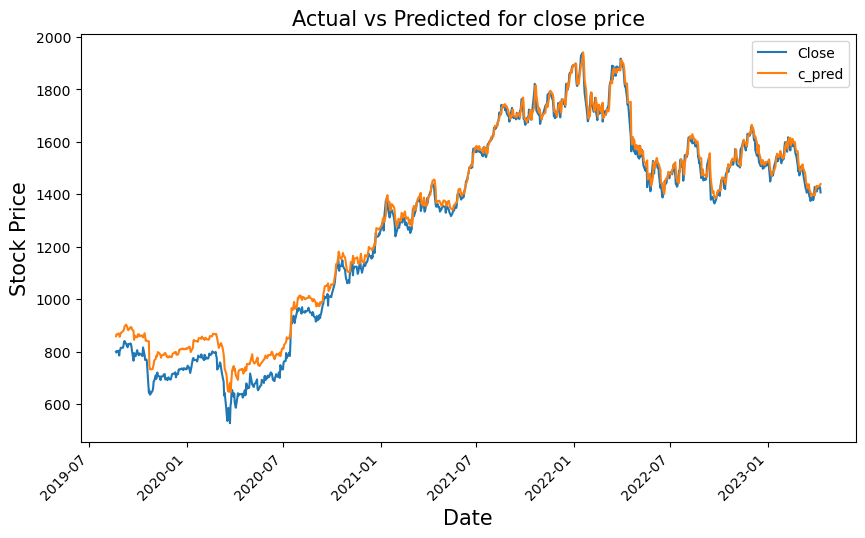

In [105]:
df_slic_data[['Close','c_pred']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [106]:
model.save('/kaggle/working/Nifty50.h5')